# Difference Curve Calculation Tutorial

This tutorial will demonstrate how to calculate difference curves and goodness of fit curves (difference of differences).

**Files needed:** ```(020)_UF_sim.txt```, ```(020)_FLT_sim.txt```, and ```expt_XRD.txt```

In [1]:
# import PyFaults package
import pyfaults as pf

# import LaTeX for typesetting
from matplotlib.pyplot import rc
rc("text", usetex=True)
rc("font", **{"family":"sans-serif","sans-serif":["Helvetica"]},size="14")
rc("text.latex",preamble=r"\usepackage{sfmath}")

In [2]:
# set file directories
filePath = "C:/Users/sincl/packages/pyfaults/pyfaults/tutorials/files/"
savePath = "C:/Users/sincl/packages/pyfaults/pyfaults/tutorials/outputs/"

In [25]:
# import data

# instrument wavelength
wl = 0.459744

# experimental
exptTwoTheta, exptInts = pf.importSim(filePath, "expt_XRD")
# convert 2theta to Q
exptQ = pf.tt_to_q(exptTwoTheta, wl)

# unit cell
unitcellQ, unitcellInts = pf.importSim(filePath, "(020)_unitcell_sim")

# unfaulted supercell
UF_Q, UF_ints = pf.importSim(filePath, "(020)_UF_sim")

# faulted supercell
FLT_Q, FLT_ints = pf.importSim(filePath, "(020)_FLT_sim")

In [26]:
# normalize intensities

exptNorm = pf.plotXRD.norm(exptInts)
unitcellNorm = pf.plotXRD.norm(unitcellInts)
UF_norm = pf.plotXRD.norm(UF_ints)
FLT_norm = pf.plotXRD.norm(FLT_ints)

Calculating difference curves between two data sets

Text files of difference curves saved to ```pyfaults/tutorials/outputs```

In [28]:
# calculate difference curve between experimental data and simulated unit cell data
expt_unitcell_diffQ, expt_unitcell_diffInts = pf.simXRD.diffCurve(exptQ, unitcellQ, exptNorm, unitcellNorm)

# save difference curve to text file
pf.simXRD.saveDiffCurve(expt_unitcell_diffQ, expt_unitcell_diffInts, savePath, "expt_unitcell_diff")

In [5]:
# calculate difference curve between experimental data and simulated unfaulted supercell data
expt_UF_diffQ, expt_UF_diffInts = pf.simXRD.diffCurve(exptQ, UF_Q, exptNorm, UF_norm)

# save difference curve to text file
pf.simXRD.saveDiffCurve(expt_UF_diffQ, expt_UF_diffInts, savePath, "expt_UF_diff")

In [6]:
# calculate difference curve between experimental data and simulated faulted supercell data
expt_FLT_diffQ, expt_FLT_diffInts = pf.simXRD.diffCurve(exptQ, FLT_Q, exptNorm, FLT_norm)

# save difference curve to text file
pf.simXRD.saveDiffCurve(expt_FLT_diffQ, expt_FLT_diffInts, savePath, "expt_FLT_diff")

In [29]:
# pair up Q and intensity data in tuples

expt = [exptQ, exptNorm]
unitcell = [unitcellQ, unitcellInts]
UF = [UF_Q, UF_norm]
FLT = [FLT_Q, FLT_norm]

expt_unitcell_diff = [expt_unitcell_diffQ, pf.plotXRD.norm(expt_unitcell_diffInts)]
expt_UF_diff = [expt_UF_diffQ, pf.plotXRD.norm(expt_UF_diffInts)]
expt_FLT_diff = [expt_FLT_diffQ, pf.plotXRD.norm(expt_FLT_diffInts)]

Create a comparison plot between unfaulted and faulted models vs experimental data

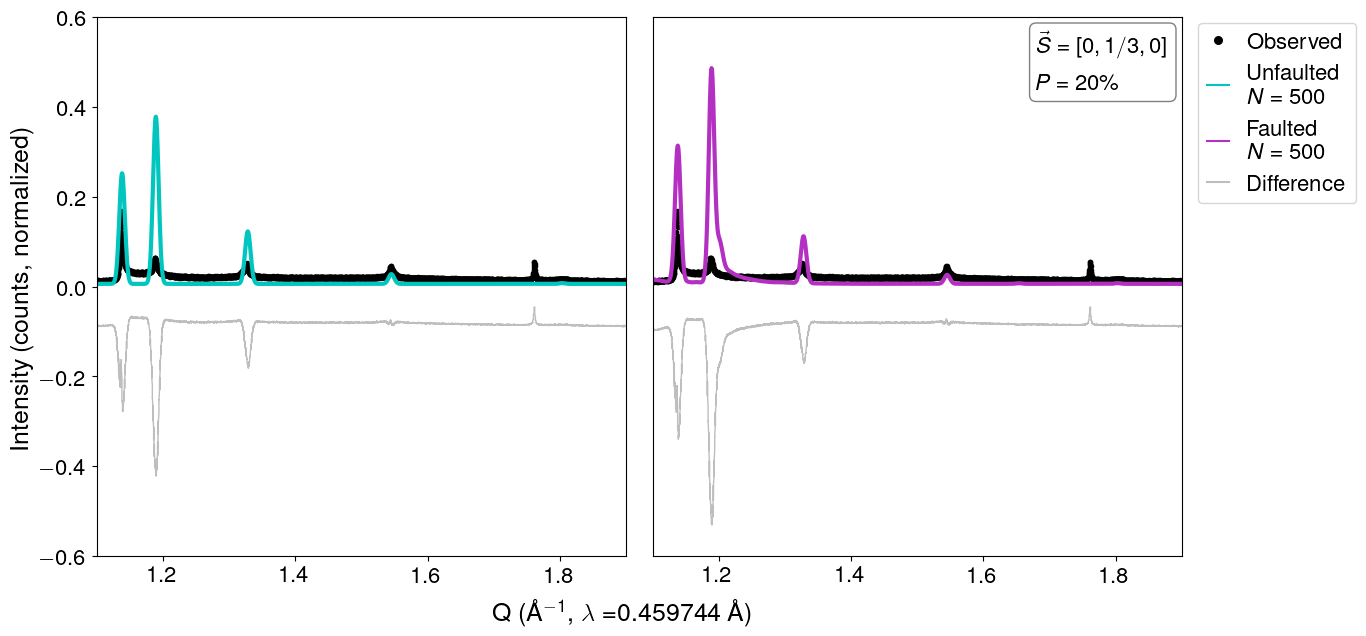

In [30]:
# set axis limits
xLim = (1.1, 1.9)
yLim = (-0.6, 0.6)
sVec = ["0", "1/3", "0"]

ax1 = pf.plotXRD.compareUFtoFLT(expt, UF, FLT, expt_UF_diff, expt_FLT_diff, 500, xLim, yLim, wl, 0.2, sVec, 
                                boxAdj=(0.58, -0.03), normalized=True, diffOffset=-0.1)